In [2]:
#Social_Network_Ads.csv

**Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


**Splitting the dataset into the Training set and Test set**

### Encoding the values of  Gender

In [5]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

### Checking the missing values

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = df.iloc[ : , 1:4]
x.head(3)

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000


In [8]:
y = df['Purchased']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

**Feature Scaling**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaling = MinMaxScaler()

In [13]:
scaling.fit_transform(x_train)

array([[0.        , 0.66666667, 0.6       ],
       [1.        , 0.52380952, 0.31111111],
       [1.        , 0.4047619 , 0.68888889],
       [0.        , 0.71428571, 0.14814815],
       [1.        , 0.26190476, 0.20740741],
       [0.        , 0.95238095, 0.05925926],
       [0.        , 0.4047619 , 0.31111111],
       [0.        , 0.42857143, 0.35555556],
       [0.        , 0.95238095, 0.17037037],
       [1.        , 0.95238095, 0.95555556],
       [1.        , 0.19047619, 0.12592593],
       [0.        , 0.26190476, 0.5037037 ],
       [0.        , 0.54761905, 0.33333333],
       [0.        , 0.88095238, 0.85185185],
       [1.        , 0.33333333, 0.77777778],
       [0.        , 0.5       , 0.32592593],
       [1.        , 0.54761905, 0.32592593],
       [0.        , 0.30952381, 0.        ],
       [0.        , 0.85714286, 0.08148148],
       [0.        , 0.97619048, 0.54074074],
       [1.        , 0.73809524, 0.52592593],
       [1.        , 0.4047619 , 0.44444444],
       [0.

In [14]:
scaling.fit_transform(x_test)

array([[1.        , 0.33333333, 0.        ],
       [1.        , 1.        , 0.18181818],
       [1.        , 0.71428571, 0.93181818],
       [0.        , 0.85714286, 0.65151515],
       [1.        , 0.80952381, 1.        ],
       [1.        , 0.28571429, 0.52272727],
       [0.        , 0.69047619, 0.24242424],
       [0.        , 0.45238095, 0.40151515],
       [0.        , 0.95238095, 0.62878788],
       [1.        , 0.73809524, 0.53030303],
       [1.        , 0.52380952, 0.31060606],
       [1.        , 0.04761905, 0.51515152],
       [0.        , 0.71428571, 0.08333333],
       [1.        , 0.71428571, 0.11363636],
       [1.        , 0.57142857, 0.34848485],
       [1.        , 0.5       , 0.4469697 ],
       [0.        , 0.21428571, 0.90151515],
       [0.        , 0.0952381 , 0.34090909],
       [1.        , 0.54761905, 0.40909091],
       [0.        , 0.23809524, 0.28030303],
       [1.        , 0.42857143, 0.25757576],
       [1.        , 0.42857143, 0.61363636],
       [0.

**Fitting Decision Tree Classification to the Training set**

In [15]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [16]:
model = dtc(criterion='entropy', max_depth=4)

In [17]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Predicting the Test set results**

In [18]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

### Checking the accuracy score

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

0.8375

**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[46,  3],
       [10, 21]], dtype=int64)

**Visualising the Training set results**

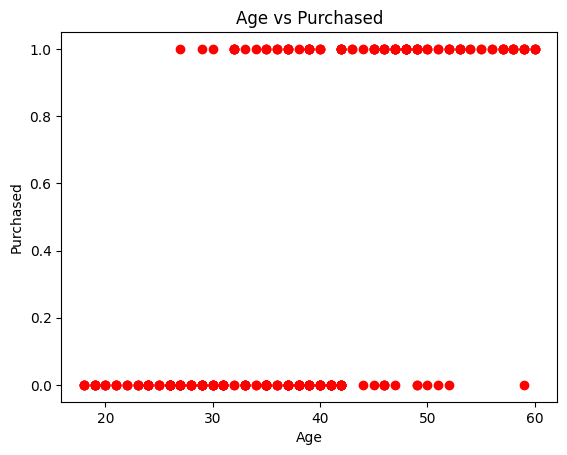

In [23]:
plt.scatter(x_train.Age, y_train, color = 'Red')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')
plt.show()

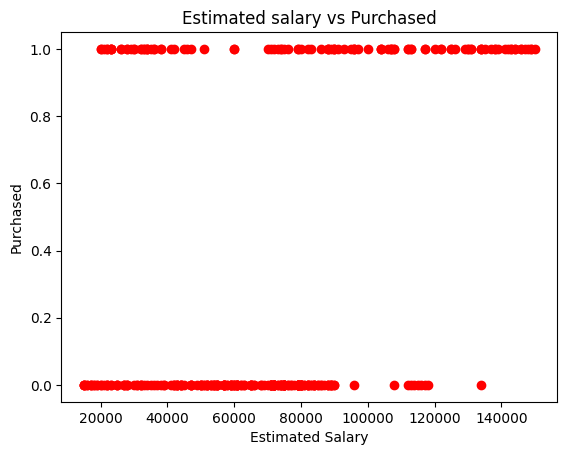

In [24]:
plt.scatter(x_train.EstimatedSalary, y_train, color = 'Red')
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Estimated salary vs Purchased')
plt.show()

**Visualising the Test set results**

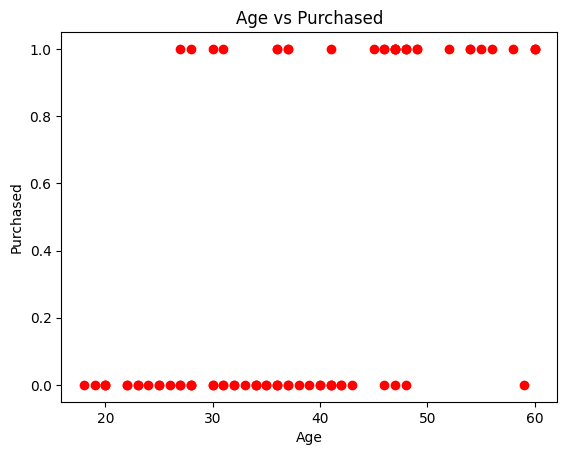

In [25]:
plt.scatter(x_test.Age, y_test, color = 'Red')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')
plt.show()

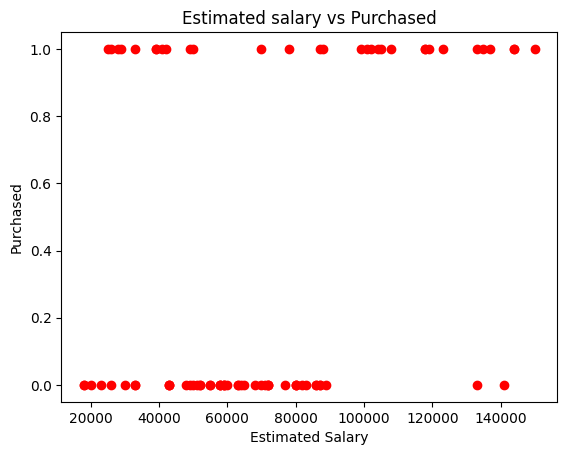

In [26]:
plt.scatter(x_test.EstimatedSalary, y_test, color = 'Red')
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Estimated salary vs Purchased')
plt.show()